- 아나콘다 프롬프트에서 다음과 같이 입력한다.
- pip install pandas_datareader

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

### 주식정보 읽어오기

In [2]:
# 시작날짜
start = datetime.datetime(2010, 1, 1)
# 종료날짜
end = datetime.datetime(2020,12, 31)

In [3]:
# 삼성전자 주식 데이터를 읽어온다
f = data.DataReader('005930.KS', 'yahoo', start, end)
f

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13134.010742
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13345.065430
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13653.530273
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13198.952148
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13328.830078
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,71766.921875
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,75554.351562
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,76428.375000


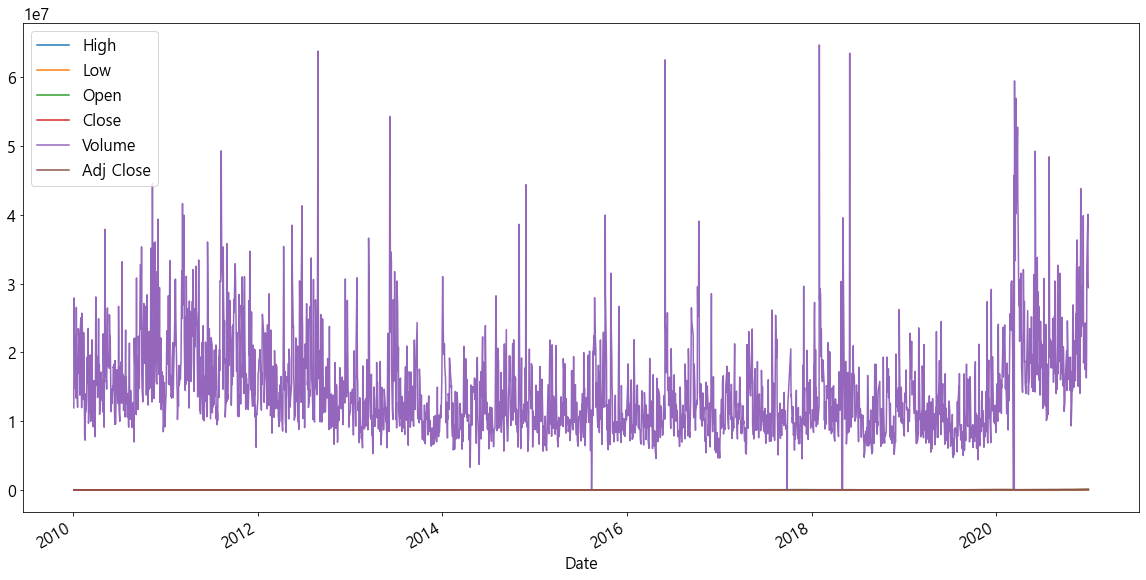

In [4]:
# 시각화
f.plot()
plt.show()

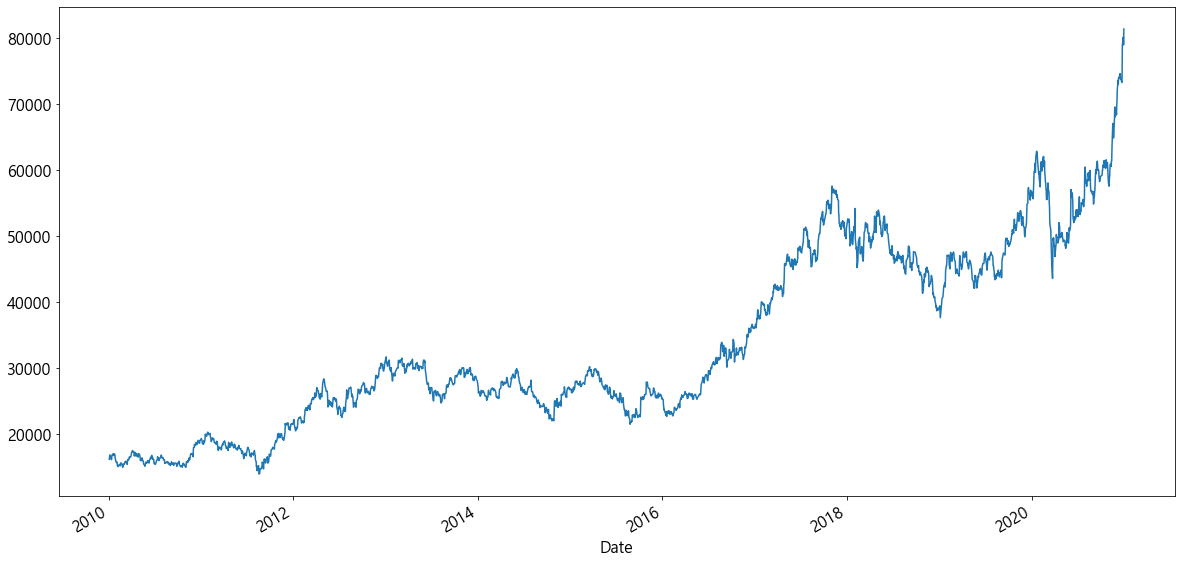

In [5]:
# 최고가에 대한 그래프를 그려본다.
f['High'].plot()
plt.show()

In [15]:
# 데이터 샘플링 : 정해진 시간 기준을 토대로 데이터를 샘플링한다.
# S : 매초, H : 매시간, A : 매년, T : 분단위, D : 일단위, W : 주단위,
# M : 분단위, Y : 년단위
# S, H, A : 기준으로 묶어준다.
# T, D, W, M, Y : 기준으로 묶는다.
list(f.resample('Y'))[0]

(Timestamp('2010-12-31 00:00:00', freq='A-DEC'),
                High      Low     Open    Close      Volume     Adj Close
 Date                                                                    
 2010-01-04  16180.0  16000.0  16060.0  16180.0  11950800.0  13134.010742
 2010-01-05  16580.0  16300.0  16520.0  16440.0  27925850.0  13345.065430
 2010-01-06  16820.0  16520.0  16580.0  16820.0  22948850.0  13653.530273
 2010-01-07  16820.0  16260.0  16820.0  16260.0  22107950.0  13198.952148
 2010-01-08  16420.0  16120.0  16400.0  16420.0  14777550.0  13328.830078
 ...             ...      ...      ...      ...         ...           ...
 2010-12-24  18780.0  18500.0  18780.0  18500.0   8471650.0  15112.184570
 2010-12-27  18600.0  18300.0  18500.0  18440.0  10524200.0  15063.169922
 2010-12-28  19000.0  18520.0  18560.0  18760.0  15650700.0  15324.572266
 2010-12-29  19020.0  18640.0  18700.0  18900.0  11918900.0  15521.671875
 2010-12-30  19040.0  18840.0  18840.0  18980.0   9181500.0  15

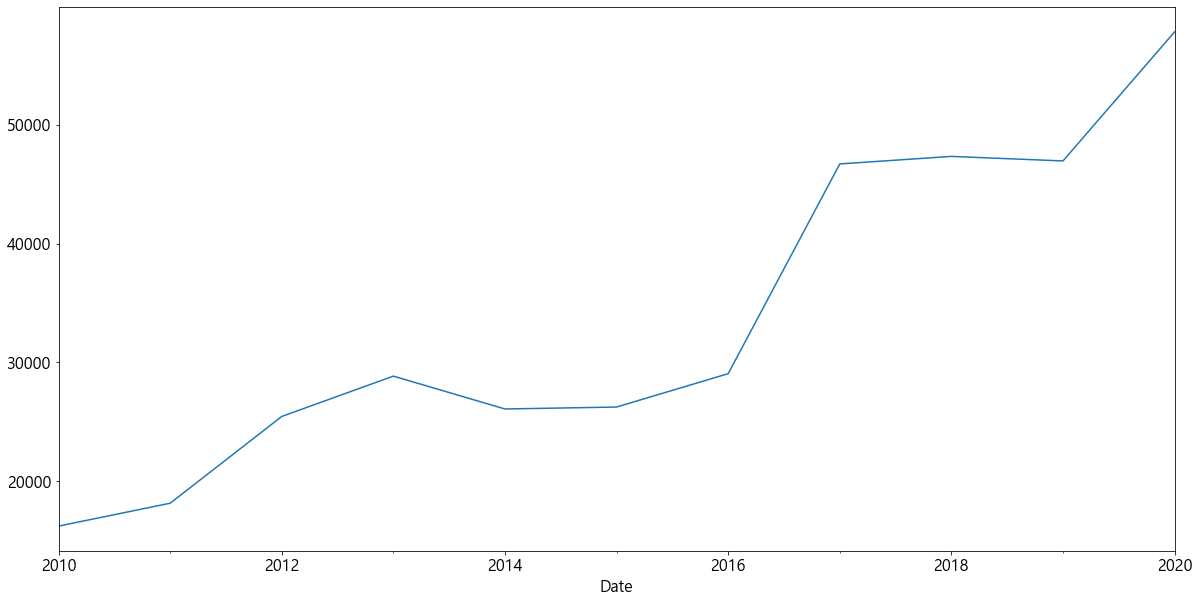

In [18]:
# 최고가를 년단위로 리샘플 한다.
a1 = f['High'].resample('Y')
# 년단위 평균을 구한다.
a2 = a1.mean()
# 시각화 한다.
a2.plot()
plt.show()